In [ ]:
%pip install kagglehub
%pip install pandas
%pip install seaborn 
%pip install sklearn
%pip install shutil
%pip install scikit-learn
%pip install notebook

# samo prvi put usporava svaki naredni put skriptu...

In [ ]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.metrics import mean_absolute_error 

path = kagglehub.dataset_download("thedevastator/weather-prediction")

In [ ]:
local_dir = "./tmp/"
local_output_dir = "./output/"
os.makedirs(local_dir, exist_ok=True)
os.makedirs(local_output_dir, exist_ok=True)

csv_files = [f for f in os.listdir(path) if f.endswith(".csv")]
first_csv = ""
if csv_files:
    first_csv = csv_files[1]
    print("Prvi CSV fajl:", first_csv)

    local_path = os.path.join(local_dir, first_csv)
    shutil.copy(os.path.join(path, first_csv), local_path)

    print(f"Fajl je preuzet u: {local_path}")

    df = pd.read_csv(local_path)
    df.head()

In [ ]:
 
df = pd.read_csv(f"{path}/{first_csv}")  
 
display(df.head()) 
df.info()
 
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Korelacija između karakteristika vremenskih podataka")
plt.show()
 
df = df.dropna()   
 

X = df.drop(columns=["TOURS_temp_max"])  
y = df["TOURS_temp_max"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
 
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"{mae}")


In [ ]:
df.columns

In [ ]:
sns.scatterplot(
    x='BASEL_temp_mean', 
    y='BASEL_humidity', 
    data=df, 
    hue='BASEL_cloud_cover', 
    palette='viridis', 
    s=200, 
    alpha=0.2
)
plt.show()

In [ ]:
if "MONTH" in df.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=df["MONTH"], y=df["BASEL_temp_mean"], marker="X", label="Basel")
    
    plt.xlabel("Mesec")
    plt.ylabel("Prosecna temperura")
    plt.title("Temperatura kroz mesece - Basel")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Kolona 'MONTH' ne postoji u datasetu.")

In [ ]:

display(df.info())
display(df.describe())

temp_columns = [col for col in df.columns if "temp" in col.lower()]
df_temp = df[temp_columns]

plt.figure(figsize=(45, 40)) 
sns.heatmap(df_temp.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.8)
plt.title("Korelacija između temperaturnih parametara")
 
plt.savefig("./output/output1.png", dpi=300, bbox_inches='tight')
plt.show()

if "BASEL_temp_mean" in df.columns and "BASEL_humidity" in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='BASEL_temp_mean', y='BASEL_humidity', data=df, hue='BASEL_cloud_cover', palette='viridis', s=200, alpha=0.5)
    plt.title("Temperatura vs Vlažnost - Basel")
 
    plt.savefig("./output/output2.png", dpi=300, bbox_inches='tight')
    plt.show()

if "MONTH" in df.columns and "BASEL_temp_mean" in df.columns:
    fig, ax = plt.subplots(figsize=(12, 6))
    norm = plt.Normalize(df["BASEL_temp_mean"].min(), df["BASEL_temp_mean"].max())
    sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
    sm.set_array([])

    sns.lineplot(x=df["MONTH"], y=df["BASEL_temp_mean"], marker="o", label="Basel", color=plt.cm.coolwarm(norm(df["BASEL_temp_mean"].mean())), ax=ax)

    plt.xlabel("Mesec")
    plt.ylabel("Prosečna temperatura")
    plt.title("Temperatura kroz mesece - Basel")
    plt.legend()
    plt.grid(True)
    plt.ylim(-50, 100)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.3)
    plt.colorbar(sm, cax=cax, label="Temperatura (°C)")
    
    plt.savefig("./output/output3.png", dpi=300, bbox_inches='tight')
    plt.show()
 
df = df.dropna()

X = df.drop(columns=["BASEL_temp_mean"])
y = df["BASEL_temp_mean"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluacija modela
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


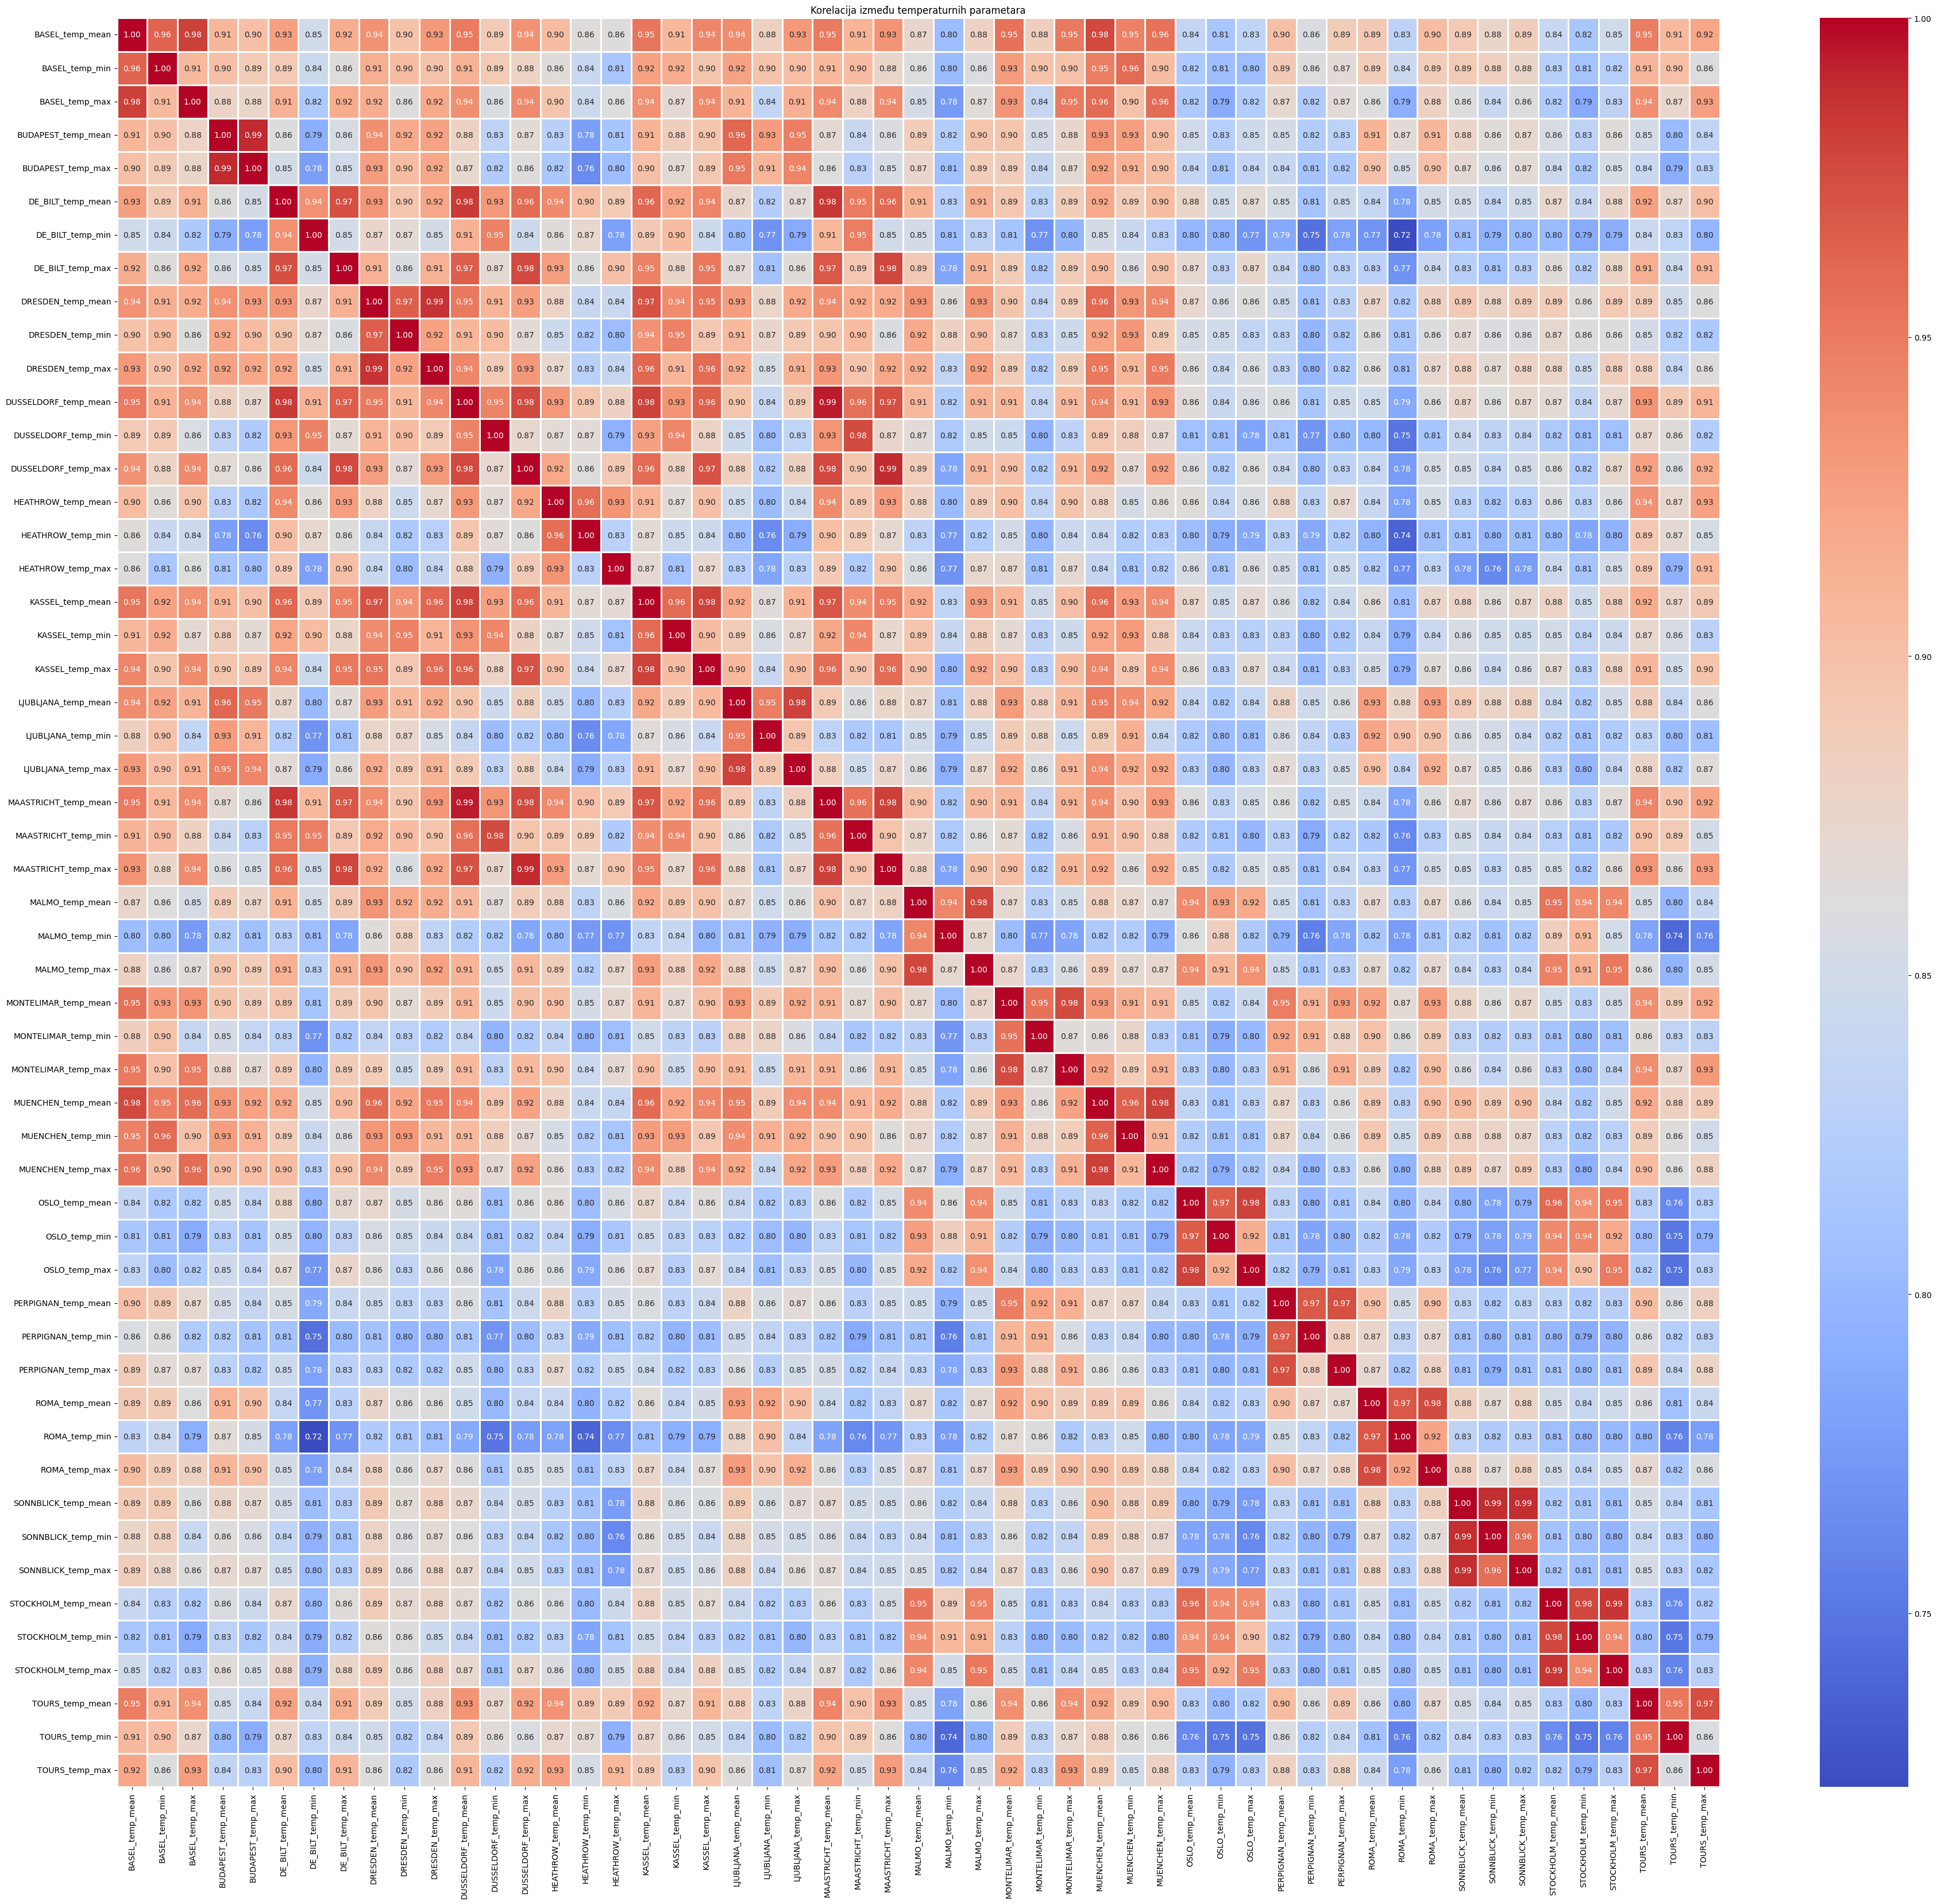

In [20]:
plt.figure(figsize=(45, 40)) 
sns.heatmap(df_temp.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.8)
plt.title("Korelacija između temperaturnih parametara")
 
plt.savefig("./output/output1.png", dpi=300, bbox_inches='tight')
plt.show()